In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import sys
sys.path.append('../src')

In [4]:
import anndata
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import seaborn as sns
import torch
import pandas as pd
import pyro
import spaceoracle
from spaceoracle import SpaceOracle
from spaceoracle.tools.utils import clean_up_adata

In [5]:
from spaceoracle.tools.data import LigRecDataset

In [6]:
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import r2_score

In [7]:
import scanpy as sc
import squidpy as sq

In [8]:
adata_train = sc.read_h5ad('./.cache/adata_train.h5ad')
adata_train

AnnData object with n_obs × n_vars = 11567 × 5013
    obs: 'cluster', 'rctd_cluster', 'rctd_celltypes'
    uns: 'log1p'
    obsm: 'X_spatial', 'rctd_results', 'spatial'
    layers: 'imputed_count', 'normalized_count', 'raw_count'

In [9]:
from spaceoracle.models.parallel_estimators import SpatialCellularProgramsEstimator

In [10]:
from spaceoracle.models.pixel_attention import CellularNicheNetwork

In [11]:
estimator = SpatialCellularProgramsEstimator(
    adata=adata_train,
    target_gene='Ccl5',
)

In [13]:
%%time

# estimator.fit(num_epochs=30, threshold_lambda=3e3, learning_rate=1e-3)
estimator.fit(num_epochs=1, threshold_lambda=3e3, learning_rate=1e-3)

0: -0.4242 | 0.8997
1: 0.5066 | 0.7529
2: -4.7313 | 0.6578
3: 0.4011 | 0.7614
4: -0.8244 | 0.8454
5: -1.7877 | 0.7985
6: 0.5834 | 0.8993
CPU times: user 30.2 s, sys: 14.2 s, total: 44.4 s
Wall time: 11.7 s


In [22]:
estimator.betadata

beta_Ackr1  beta_Ackr4  beta_Acvr2a  beta_Bmpr1a  \
AAAAAACGGTAGAT  0.000000e+00   -0.005214     0.000000          0.0   
AAAAAATCCGGCGA  9.967820e-05   -0.000124     0.000000          0.0   
AAAAACCGTCAGAC  0.000000e+00   -0.004441     0.000000          0.0   
AAAAACGCTCCGAC  0.000000e+00   -0.003503     0.000000          0.0   
AAAAAGCACGTGTT  0.000000e+00   -0.007299     0.000000          0.0   
...                      ...         ...          ...          ...   
TTTTTTCGCGGCTA  5.015241e-04   -0.001172     0.000000          0.0   
TTTTTTGGGCTGGT  1.556843e-04   -0.007391    -0.000170          0.0   
TTTTTTGTACCCAC  2.054581e-19   -0.008089    -0.000153          0.0   
TTTTTTGTACGATT  0.000000e+00   -0.000999     0.000000          0.0   
TTTTTTTTGCTTTA  0.000000e+00   -0.007924     0.000000          0.0   

                beta_Bmpr2  beta_Ccr1  beta_Ccr2  beta_Ccr5  beta_Ccr6  \
AAAAAACGGTAGAT         0.0  -0.009168  -0.004001   0.009286        0.0   
AAAAAATCCGGCGA         0.0  -0.000003   0.012384   0.000000        0.0   
AAAAACCGTCAGAC         0.0  -0.005879  -0.000763   0.007863        0.0   
AAAAACGCTCCGAC         0.0  -0.004769   0.001116   0.006216        0.0   
AAAAAGCACGTGTT         0.0   0.002628   0.003272   0.012934        0.0   
...                    ...        ...        ...        ...        ...   
TTTTTTCGCGGCTA         0.0  -0.000032   0.024095   0.000000        0.0   
TTTTTTGGGCTGGT         0.0   0.000325  -0.013219   0.000000        0.0   
TTTTTTGTACCCAC         0.0   0.000530  -0.011756   0.000000        0.0   
TTTTTTGTACGATT         0.0   0.009740   0.001984   0.001798        0.0   
TTTTTTTTGCTTTA         0.0  -0.037121  -0.004841   0.014061        0.0   

                beta_Cdh5  ...  beta_Pard3  beta_Pirb  beta_Plxna3  beta_Sdc2  \
AAAAAACGGTAGAT        0.0  ...    0.006319   0.010856     0.000000   0.001064   
AAAAAATCCGGCGA        0.0  ...    0.000000   0.012386     0.005709   0.011544   
AAAAACCGTCAGAC        0.0  ...    0.008378   0.013699     0.000000  -0.004421   
AAAAACGCTCCGAC        0.0  ...    0.007564   0.013577     0.000000  -0.000285   
AAAAAGCACGTGTT        0.0  ...    0.010375   0.018260     0.000000  -0.002337   
...                   ...  ...         ...        ...          ...        ...   
TTTTTTCGCGGCTA        0.0  ...    0.000000   0.013981     0.006677   0.017431   
TTTTTTGGGCTGGT        0.0  ...    0.009981   0.009363     0.000000   0.022212   
TTTTTTGTACCCAC        0.0  ...    0.012588   0.009979     0.000000   0.014596   
TTTTTTGTACGATT        0.0  ...    0.004656   0.013716     0.000000   0.015122   
TTTTTTTTGCTTTA        0.0  ...    0.008097   0.012678     0.000000  -0.005876   

                beta_Sdc3  beta_Sdc4  beta_Tnfrsf13c  beta_Tnfrsf1a  \
AAAAAACGGTAGAT   0.009475  -0.016563       -0.019860       0.000000   
AAAAAATCCGGCGA   0.054729  -0.017155        0.000000      -0.007797   
AAAAACCGTCAGAC   0.004042  -0.015838       -0.022439       0.000000   
AAAAACGCTCCGAC   0.008633  -0.017319       -0.022270       0.000000   
AAAAAGCACGTGTT   0.010484  -0.024235       -0.031847       0.000000   
...                   ...        ...             ...            ...   
TTTTTTCGCGGCTA   0.029251  -0.025824        0.000000      -0.011996   
TTTTTTGGGCTGGT   0.009610  -0.009645       -0.098775      -0.008049   
TTTTTTGTACCCAC   0.009709   0.003811       -0.107253      -0.009258   
TTTTTTGTACGATT   0.027325  -0.025600       -0.016895       0.000000   
TTTTTTTTGCTTTA   0.002019  -0.014686       -0.024773       0.000000   

                beta_Tnfrsf9  beta_Tyro3  
AAAAAACGGTAGAT      0.000000    0.008545  
AAAAAATCCGGCGA      0.000000    0.000000  
AAAAACCGTCAGAC      0.000000    0.011693  
AAAAACGCTCCGAC      0.000000    0.007990  
AAAAAGCACGTGTT      0.000000    0.014509  
...                      ...         ...  
TTTTTTCGCGGCTA      0.000000    0.000000  
TTTTTTGGGCTGGT      0.004530    0.009405  
TTTTTTGTACCCAC      0.006555    0.017310  
TTTTTTGTACGATT      0.000000    

In [17]:
estimator.lr['pairs']


12        Bmp2$Bmpr1a
12        Bmp2$Acvr2a
14         Bmp2$Bmpr2
93       Gdf10$Acvr2a
589        Vegfa$Flt1
            ...      
1078      Sema3d$Nrp2
1082      Sema3f$Nrp2
1084    Sema3f$Plxna3
1107       Gas6$Mertk
1108       Gas6$Tyro3
Name: pairs, Length: 92, dtype: object

In [14]:
df = estimator.betadata

AssertionError: 

In [88]:
betas = torch.from_numpy(
    df[['beta0']+['beta_'+i for i in estimator.modulators]].values).float()

inputs_x = torch.from_numpy(
    estimator.train_df.drop(
        columns=estimator.target_gene).values).float()

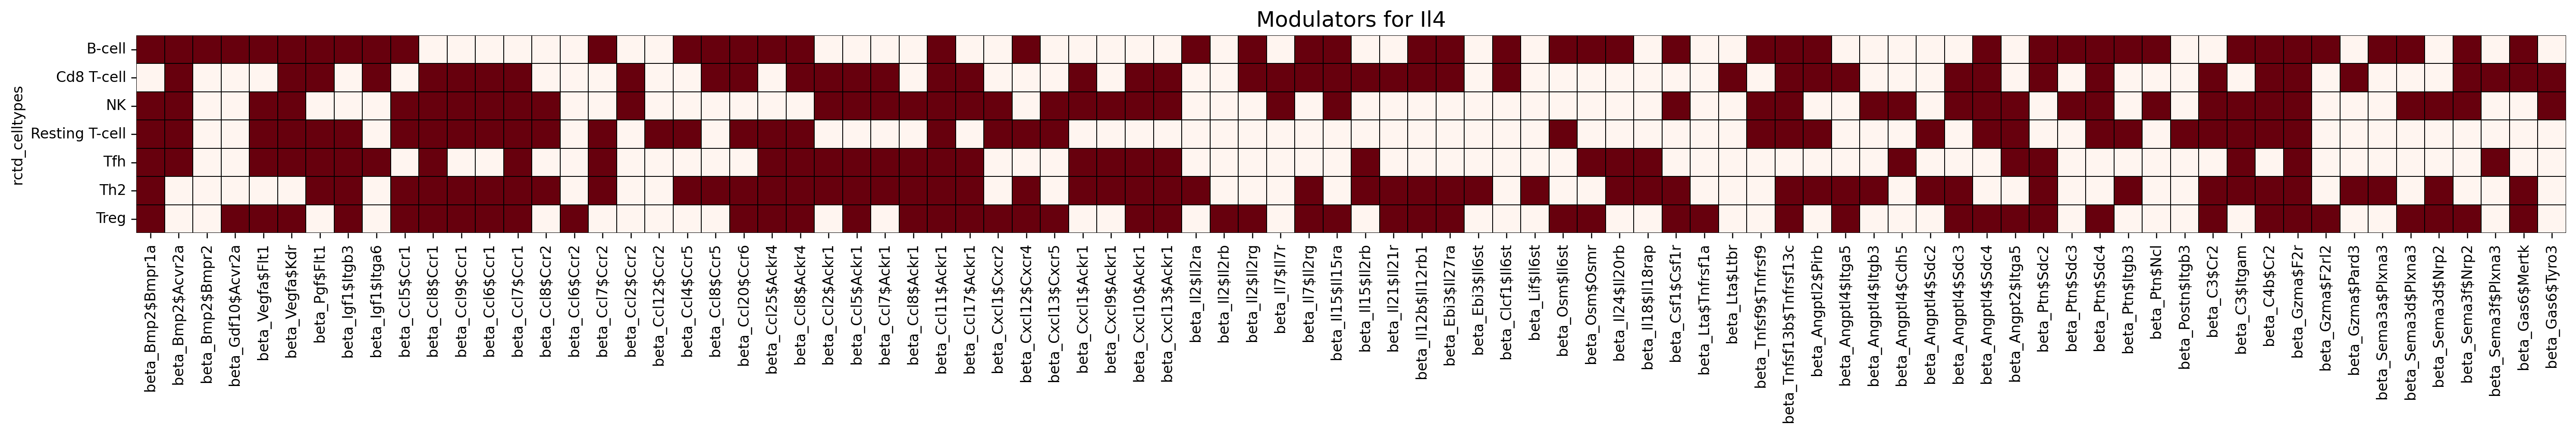

In [89]:
plt.rcParams['figure.figsize'] = (25, 10)
plt.rcParams['figure.dpi'] = 120

hmap = df[[
        'beta_'+i for i in estimator.modulators]+[
            'rctd_celltypes']].groupby('rctd_celltypes').mean().abs()>0


sns.heatmap(
    hmap.loc[:, (hmap.sum(0) > 0)],
    square=True,
    cbar=False,
    linewidths=0.5,
    linecolor='black',
    xticklabels=True,
    yticklabels=True,
    cmap='Reds'
)
plt.title(f'Modulators for {estimator.target_gene}', fontsize=15)
plt.tight_layout()
plt.show()

In [71]:
y_pred = CellularNicheNetwork.predict_y(inputs_x, betas)

In [72]:
r2_score(
    estimator.train_df[estimator.target_gene], 
    y_pred.cpu().numpy()
)


0.9927721068042662

In [73]:
cmaps = dict(zip(range(7), ['rainbow', 'hot', 'cool_r', 'spring', 'viridis', 'PuRd', 'Reds']))


In [80]:
df[['beta0']+['beta_'+i for i in estimator.modulators]].mean().abs().sort_values(ascending=False)[:40]

beta_Ccl11$Ackr1           0.853663
beta_Mef2c                 0.244473
beta0                      0.216275
beta_Ebf1                  0.188863
beta_Pax5                  0.151752
beta_Bcl11a                0.149774
beta_Bcl11b                0.138097
beta_Irf8                  0.069278
beta_Egr1                  0.066103
beta_C3$Cr2                0.063625
beta_Angptl4$Sdc4          0.053612
beta_Tnfsf13b$Tnfrsf13c    0.051130
beta_Cxcl10$Ackr1          0.037519
beta_Pou2f2                0.031832
beta_Il2$Il2rg             0.029098
beta_Cebpb                 0.023615
beta_Tnfsf9$Tnfrsf9        0.023363
beta_Angptl4$Itgb3         0.022358
beta_Ebi3$Il6st            0.020783
beta_Lta$Ltbr              0.020274
beta_Tal1                  0.019338
beta_Ccl2$Ackr1            0.018827
beta_Ptn$Sdc3              0.018776
beta_Prdm9                 0.018725
beta_Ccl6$Ccr2             0.018355
beta_Cxcl13$Ackr1          0.018224
beta_Cxcl1$Cxcr2           0.016741
beta_Taf1                  0

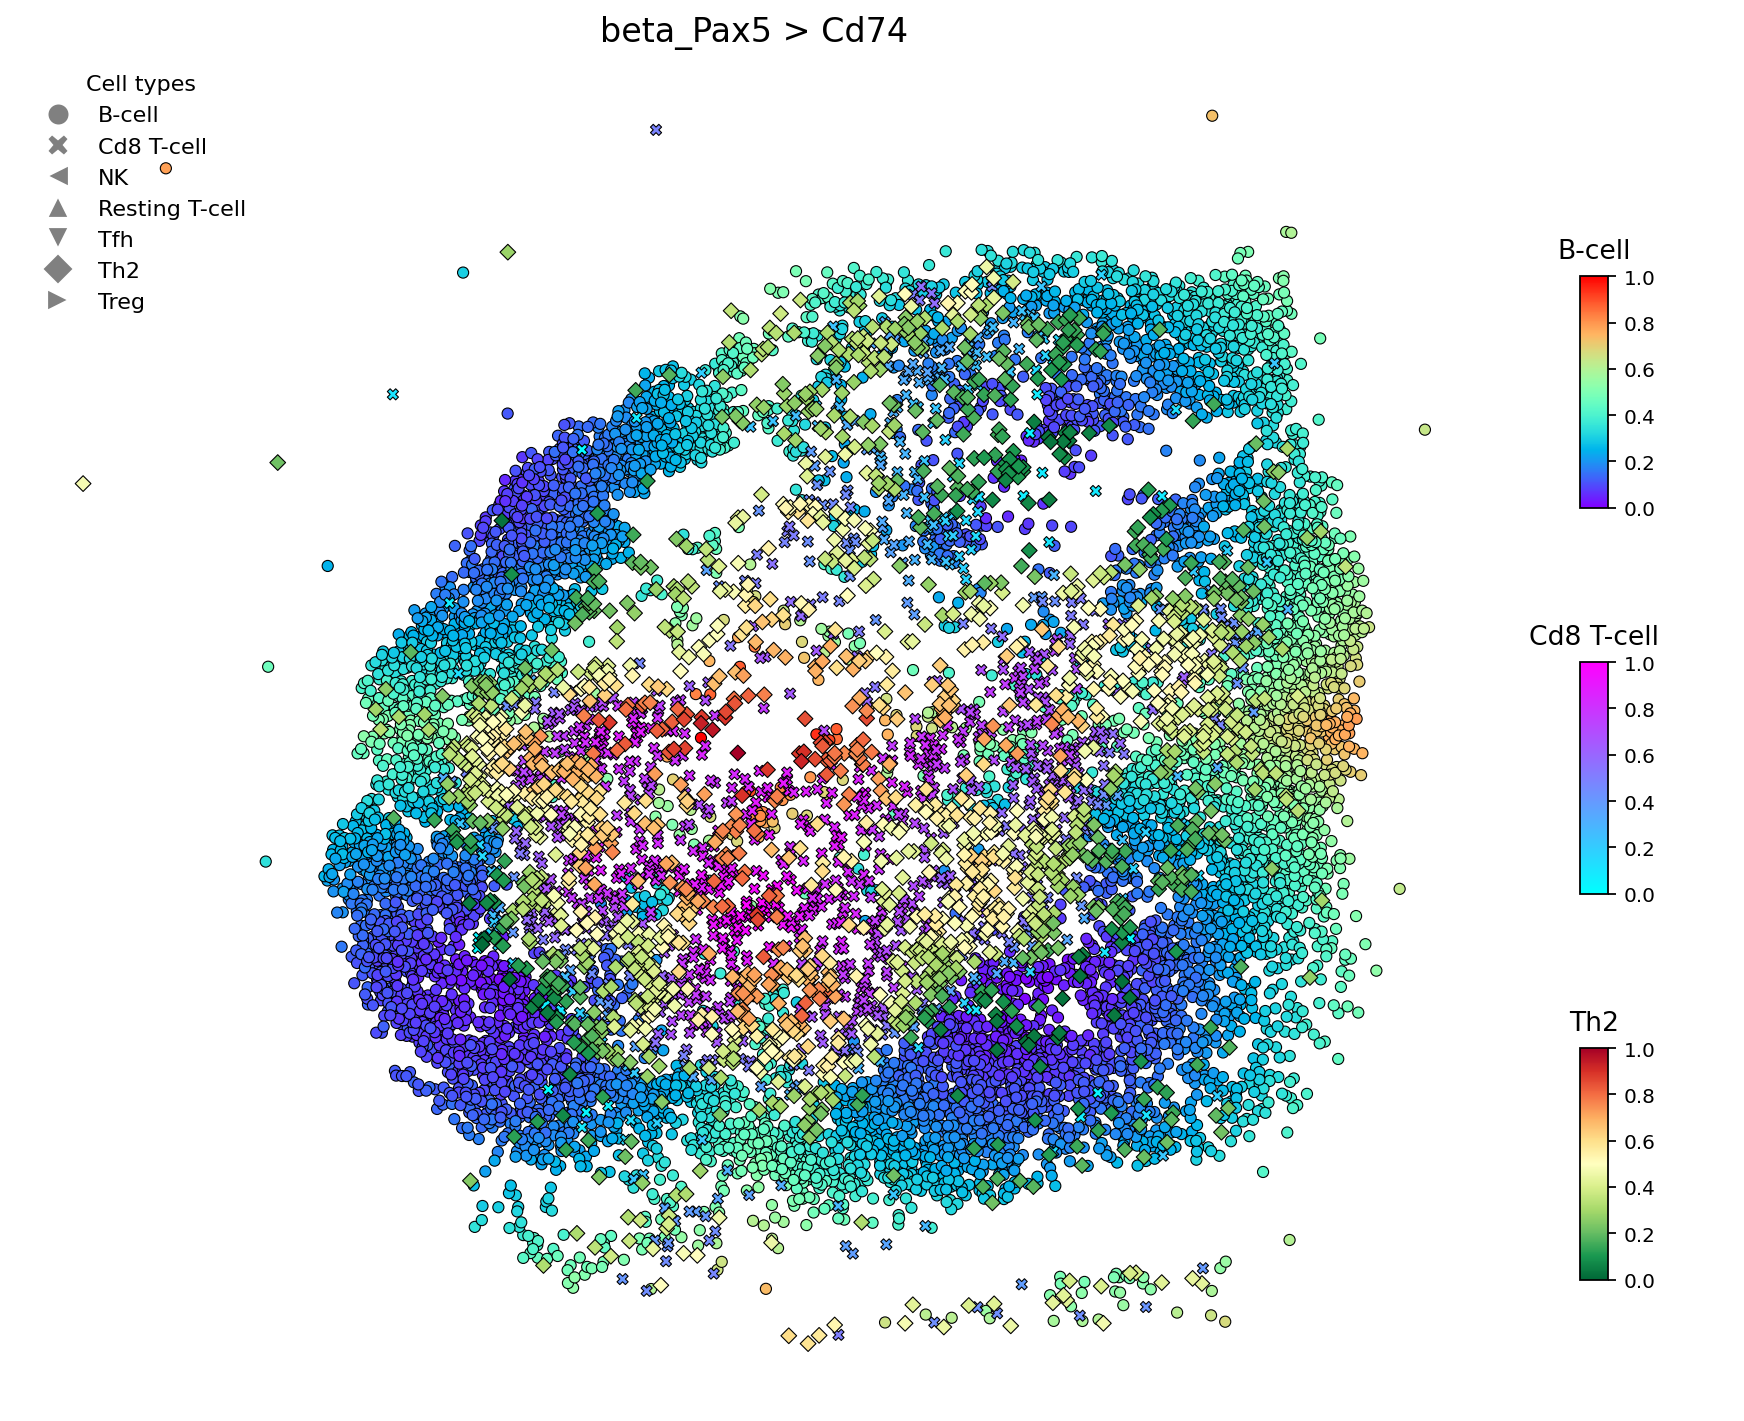

In [84]:
markers = ['o', 'X', '<', '^', 'v', 'D', '>']
cmaps = dict(zip(range(7), ['rainbow', 'cool', 'RdYlGn_r', 'spring_r', '', 'PuRd', 'Reds']))

plot_for = 'beta_Pax5'
cell_map = dict(zip(df['rctd_cluster'], df['rctd_celltypes']))

fig, (ax, cax) = plt.subplots(1, 2, dpi=80, figsize=(11, 9), gridspec_kw={'width_ratios': [4, 0.5]})

for i in [0, 1, 2]:
    betas_df = df[['beta0']+['beta_'+i for i in np.unique(estimator.modulators+estimator.ligands+estimator.receptors)]][df.rctd_cluster==i]
    # betas_df = betas_df.join(estimator.train_df)
    # betas_df[plot_for] = betas_df[plot_for]*betas_df[plot_for.replace('beta_', '')]

    sns.scatterplot(
        data=betas_df.join(df[['x', 'y', 'rctd_celltypes']]),
        x='x', 
        y='y',
        hue=plot_for,
        palette=cmaps[i],
        s=25,
        # alpha=1 if i == 0 else 0.1,
        alpha=1,
        linewidth=0.5,
        edgecolor='black',
        legend=False,
        style='rctd_celltypes',
        markers=markers,
        ax=ax
    )
ax.axis('off')

norm = None
cbar_width = 0.15  # Width of each colorbar
cbar_height = 0.8 / len(cmaps)  # Height of each colorbar
for i, cmap_name in cmaps.items():
    if i not in [0, 1, 2]:
        continue
    cmap = plt.get_cmap(cmap_name)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cax_i = cax.inset_axes([0.2, 0.95 - (i+1)*cbar_height*2.5, cbar_width, cbar_height*1.5])
    cbar = fig.colorbar(sm, cax=cax_i, orientation='vertical')
    cbar.ax.tick_params(labelsize=9)  # Reduce tick label size
    cbar.ax.set_title(f'{cell_map[i]}', fontsize=12, pad=8)  # Reduce title size and padding

cax.set_ylabel(plot_for, fontsize=8)
cax.axis('off')

unique_styles = sorted(set(df['rctd_celltypes']))
style_handles = [plt.Line2D([0], [0], marker=m, color='w', markerfacecolor='gray', 
                markersize=10, linestyle='None', alpha=1) 
                for m in markers][:len(unique_styles)]
ax.legend(style_handles, unique_styles, ncol=1,
    title='Cell types', loc='upper left', 
    frameon=False)

ax.set_title(f'{plot_for} > {estimator.target_gene}', fontsize=15)
plt.tight_layout()
# plt.savefig(f'/tmp/{plot_for}_to_{estimator.target_gene}.svg', dpi=300, format='svg')
plt.show()

In [72]:
betas_df.mean(0).sort_values(ascending=False)

beta_Il12b$Il12rb1    2.076784e-08
beta_Ebf1             2.026131e-08
beta_Ccl2$Ackr1       1.823518e-08
beta_Ptn$Ncl          1.722211e-08
beta_Gas6$Mertk       1.519598e-08
                          ...     
beta_Gdf10$Acvr2a    -1.671558e-08
beta_Csf1$Csf1r      -2.076784e-08
beta_Angptl2$Pirb    -2.127437e-08
beta_Bcl11a          -2.127437e-08
beta_Ptn$Sdc4        -2.228744e-08
Length: 132, dtype: float32

In [40]:
from sklearn.preprocessing import StandardScaler


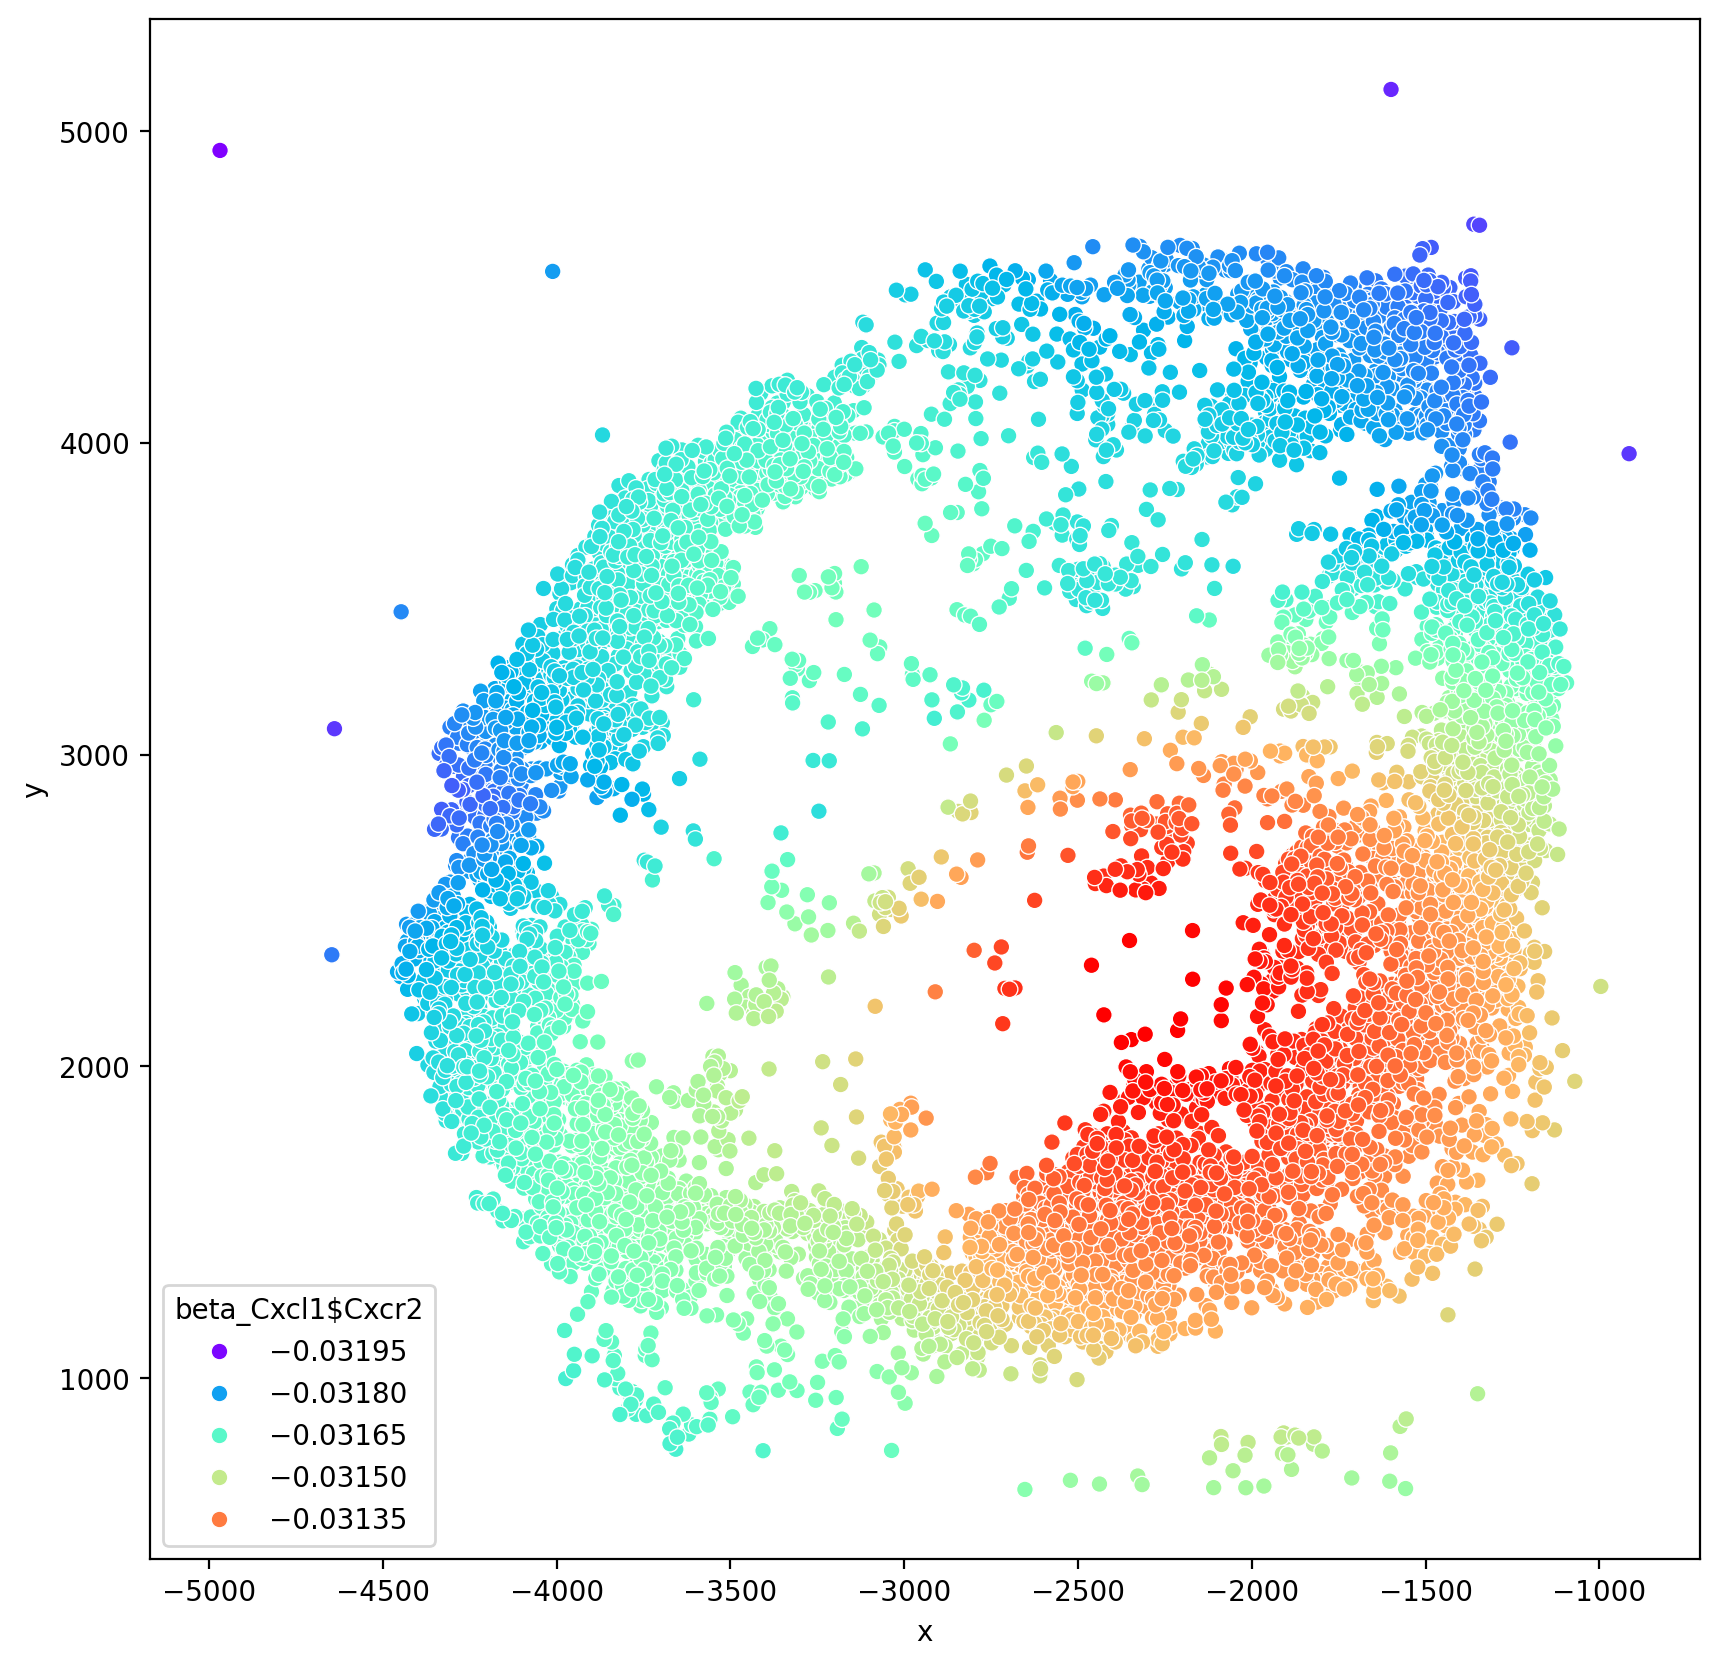

In [39]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.scatterplot(data=df[['beta_Cxcl1$Cxcr2']].join(df[['x', 'y']])[df.rctd_cluster==0],
     x='x', y='y', hue='beta_Cxcl1$Cxcr2', palette='rainbow')
plt.show()

In [234]:
df[['rctd_cluster', 'rctd_celltypes']]

rctd_cluster rctd_celltypes
AAAAAACGGTAGAT            0         B-cell
AAAAAATCCGGCGA            4            Tfh
AAAAACCGTCAGAC            0         B-cell
AAAAACGCTCCGAC            0         B-cell
AAAAAGCACGTGTT            0         B-cell
...                     ...            ...
TTTTTTCGCGGCTA            4            Tfh
TTTTTTGGGCTGGT            2            Th2
TTTTTTGTACCCAC            2            Th2
TTTTTTGTACGATT            0         B-cell
TTTTTTTTGCTTTA            0         B-cell

[11567 rows x 2 columns]

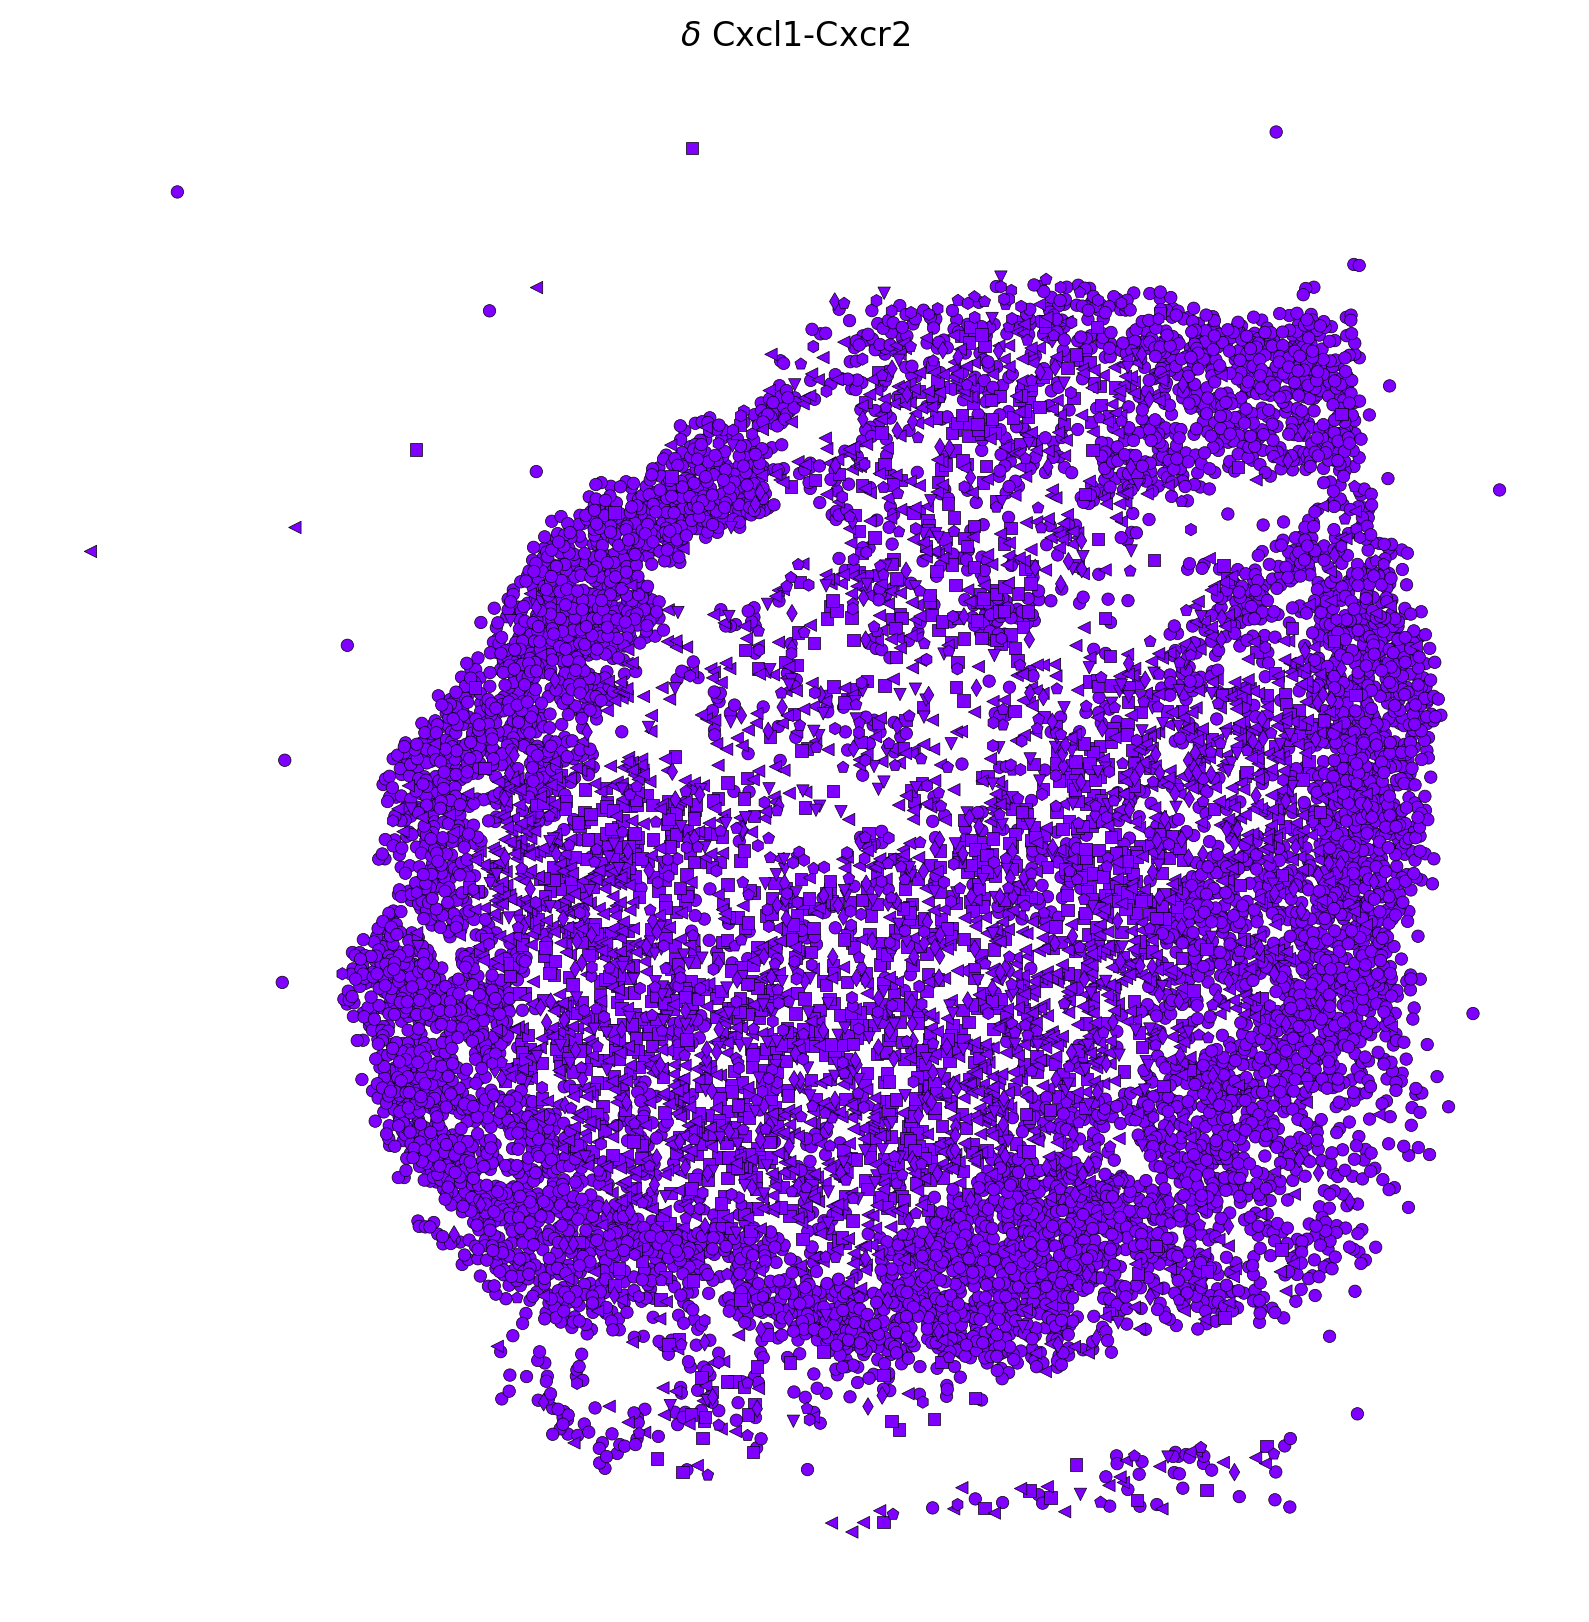

In [240]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 100
clusters = range(7)
markers = ['o', 's', '<', 'v', 'd', 'p', 'h']

for cluster, marker in zip(clusters, markers):
    data = df[df.rctd_cluster == cluster].copy()
    data['beta_Pax5'] = data['beta_Pax5'].mean()
    sns.scatterplot(data=data, x='x', y='y', hue='beta_Pax5',
                    linewidth=0.25, edgecolor='black',
                    palette='rainbow', marker=marker, legend=False, s=20)

# plt.colorbar(label='beta_Cxcl1$Cxcr2')
# Remove frame and ticks
plt.gca().set_frame_on(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.xlabel('')
plt.ylabel('')
plt.title(r'$\delta$'+ f' Cxcl1-Cxcr2')
plt.show()

0.9722947128576629


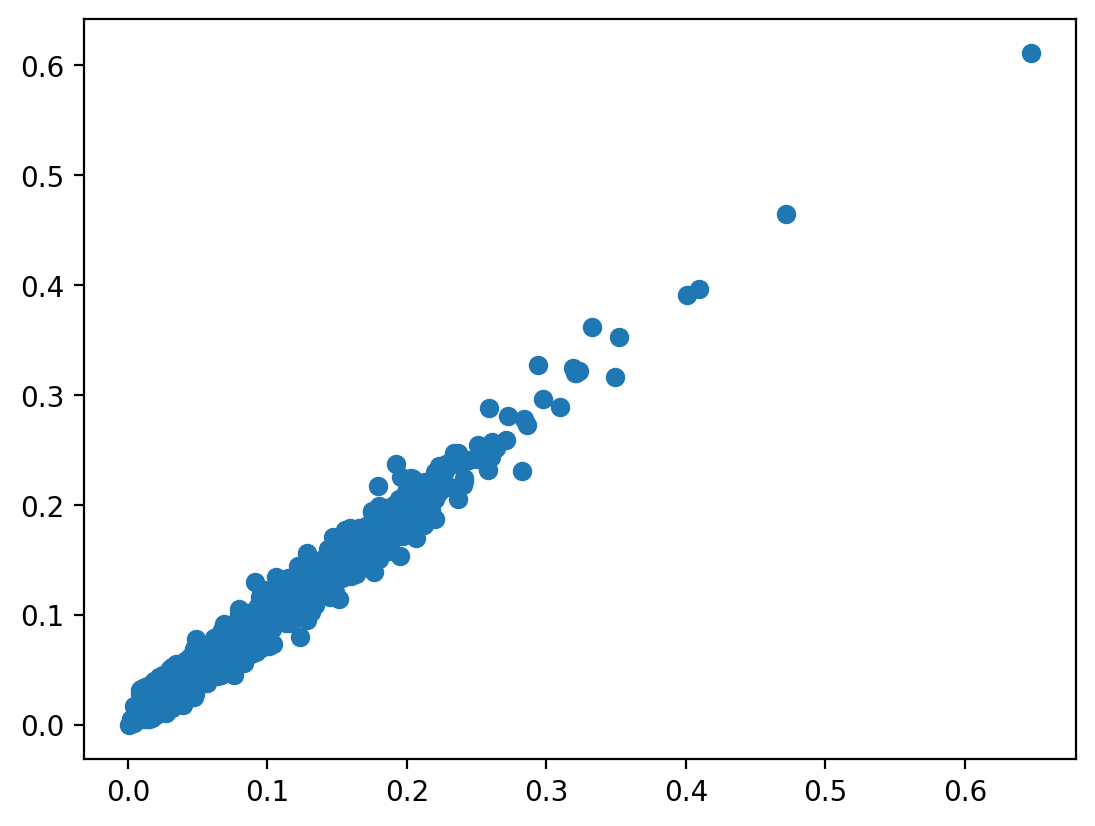

In [128]:
y_pred = (estimator.Xn[estimator.cluster_labels==2] @ b[estimator.cluster_labels==2].values[:, 1:].mean(0).T) + b[estimator.cluster_labels==2].values[:, 0].mean(0)
plt.scatter(estimator.yn[estimator.cluster_labels==2], y_pred)
print(r2_score(estimator.yn[estimator.cluster_labels==2], y_pred))

In [125]:
y_pred = torch.matmul(
                torch.from_numpy(estimator.Xn[estimator.cluster_labels==2]).unsqueeze(1).float(), 
                torch.from_numpy(b[estimator.cluster_labels==2].values)[:, 1:].unsqueeze(2).float()
            ).squeeze(1).squeeze(1) + \
                torch.from_numpy(b[estimator.cluster_labels==2].values)[:, 0].float()

0.9722973714230045


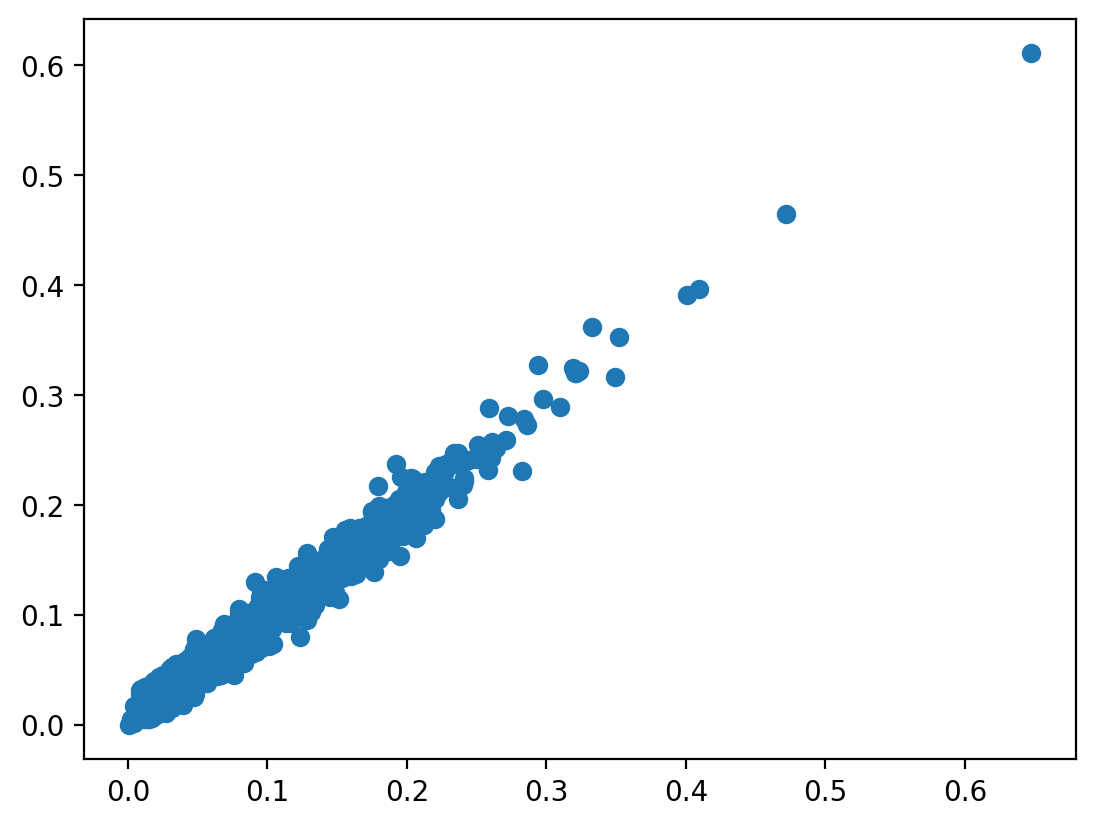

In [127]:
plt.scatter(estimator.yn[estimator.cluster_labels==2], y_pred.cpu().numpy())
print(r2_score(estimator.yn[estimator.cluster_labels==2], y_pred.cpu().numpy()))

In [102]:
b[estimator.cluster_labels==0].values[:, 0].shape

(7531,)

In [106]:
b[estimator.cluster_labels==0].values[:, 1:].mean(0).shape

(131,)

In [47]:
b1 = estimator.get_betas(1)

In [48]:
b0.shape, b1.shape

((7531, 132), (1246, 132))

In [49]:
estimator.modulators.index('Pax5')

21

In [50]:
[(x, estimator.models[x].anchors[22].item()) for x in range(7)]

[(0, 0.11134880036115646),
 (1, 0.21343275904655457),
 (2, 0.20137250423431396),
 (3, 0.24226118624210358),
 (4, 0.20296435058116913),
 (5, 0.16821637749671936),
 (6, 0.19996456801891327)]

In [51]:
estimator.yn[estimator.cluster_labels==0].mean()

0.4733534782902476

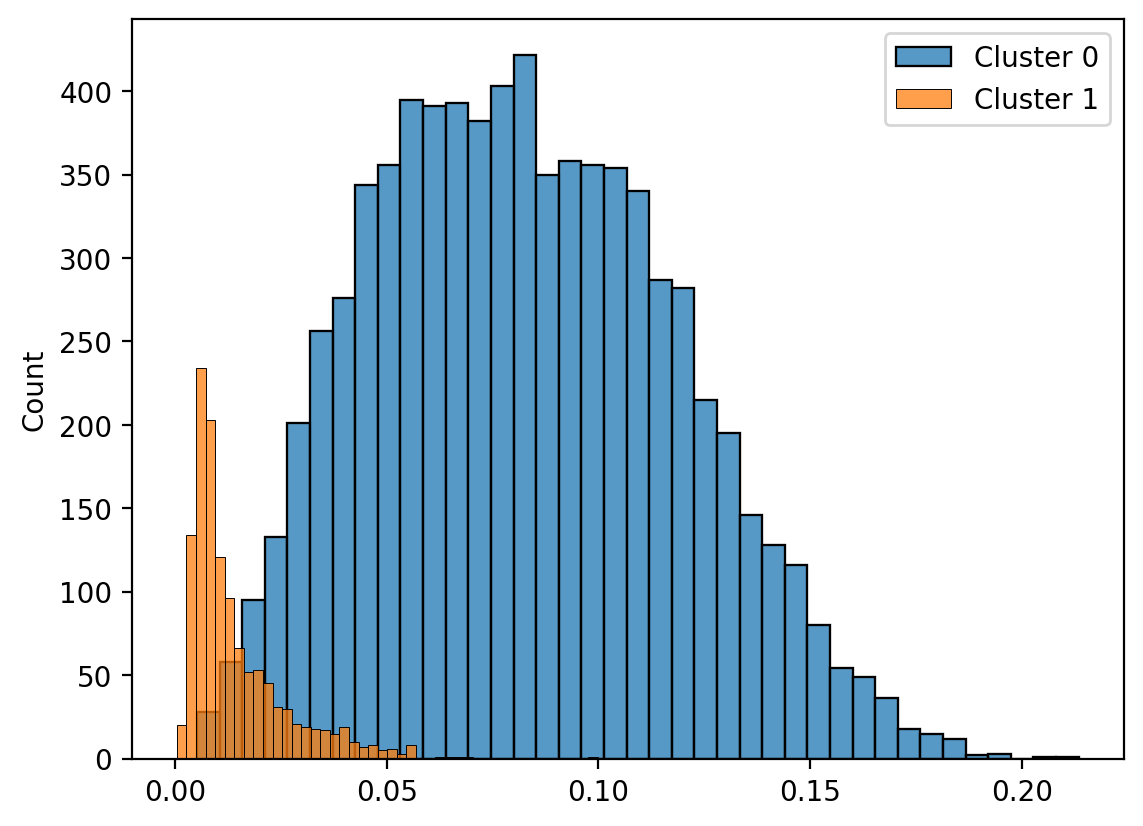

In [67]:
sns.histplot(estimator.Xn[estimator.cluster_labels==0][:, 21]*estimator.models[1].anchors[22].item(), label='Cluster 0')
sns.histplot(estimator.Xn[estimator.cluster_labels==1][:, 21]*estimator.models[1].anchors[22].item(), label='Cluster 1')
plt.legend()
plt.show()

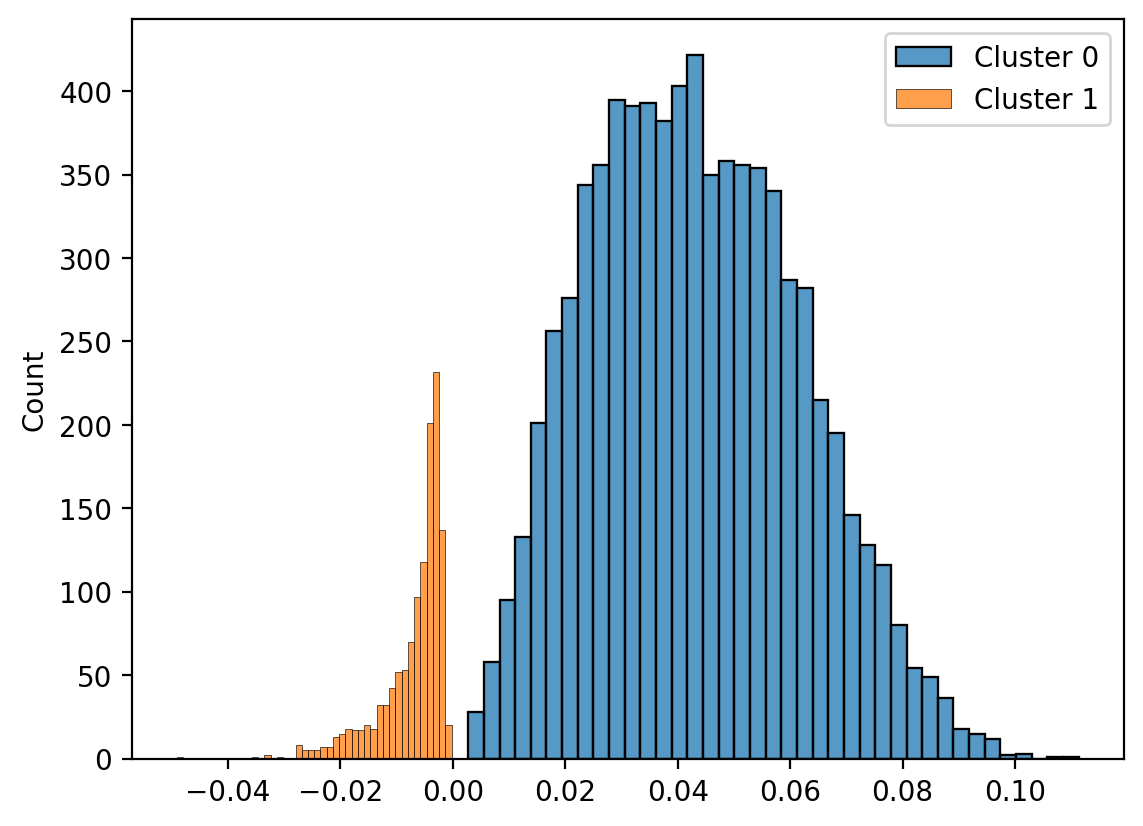

In [78]:
sns.histplot(estimator.Xn[estimator.cluster_labels==0][:, 21]*b0[:, 22], label='Cluster 0')
sns.histplot(estimator.Xn[estimator.cluster_labels==1][:, 21]*b1[:, 22], label='Cluster 1')
plt.legend()
plt.show()

In [59]:
estimator.Xn[estimator.cluster_labels==1][:, 21]*estimator.models[1].anchors[22].item()


array([0.01862047, 0.01619013, 0.0065103 , ..., 0.00693913, 0.0142291 ,
       0.02362541])

In [58]:
estimator.models[1].anchors[22].item()

0.21343275904655457

In [28]:
estimator.models[2].anchors[22]


tensor(0.2077, device='mps:0')

In [22]:
b1[:, 22].mean()

0.20782451

In [23]:
b0[:, 22].mean()

0.10963446

<Axes: ylabel='Density'>

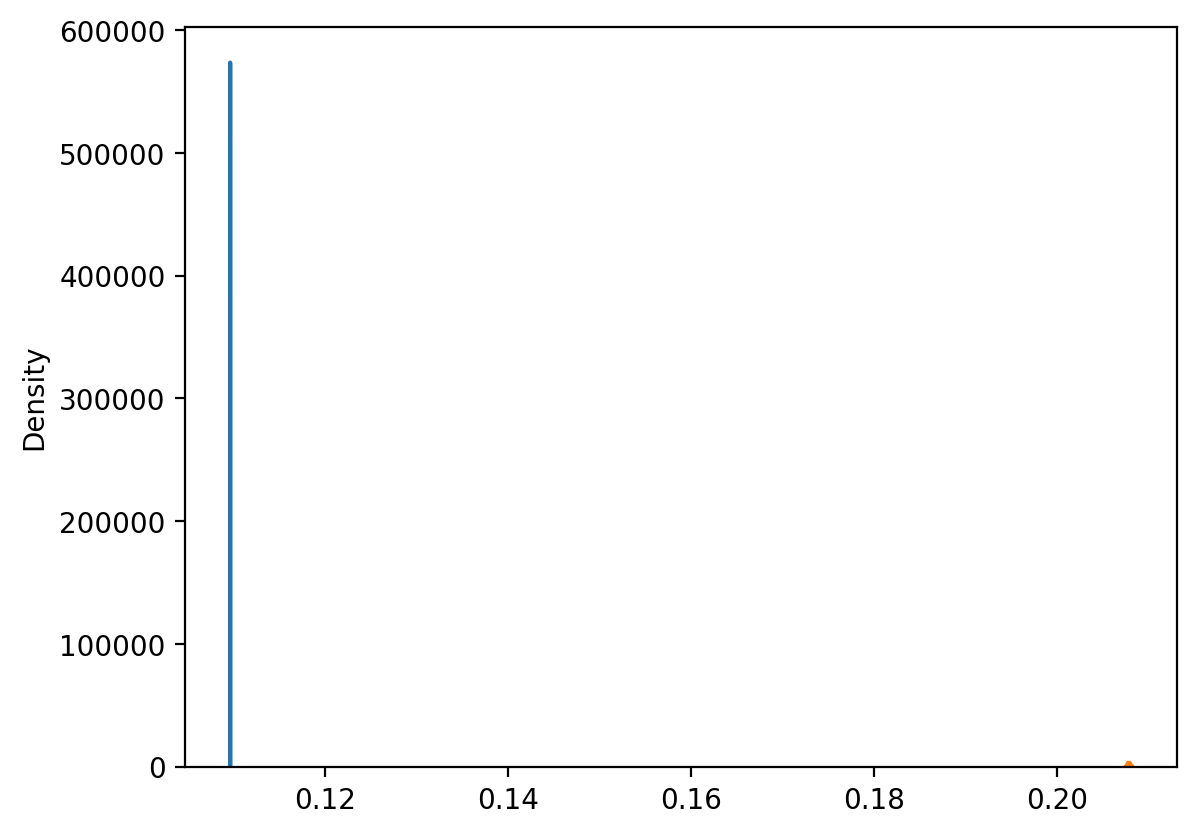

In [21]:
sns.kdeplot(b0[:, 22])
sns.kdeplot()


<Axes: ylabel='Count'>

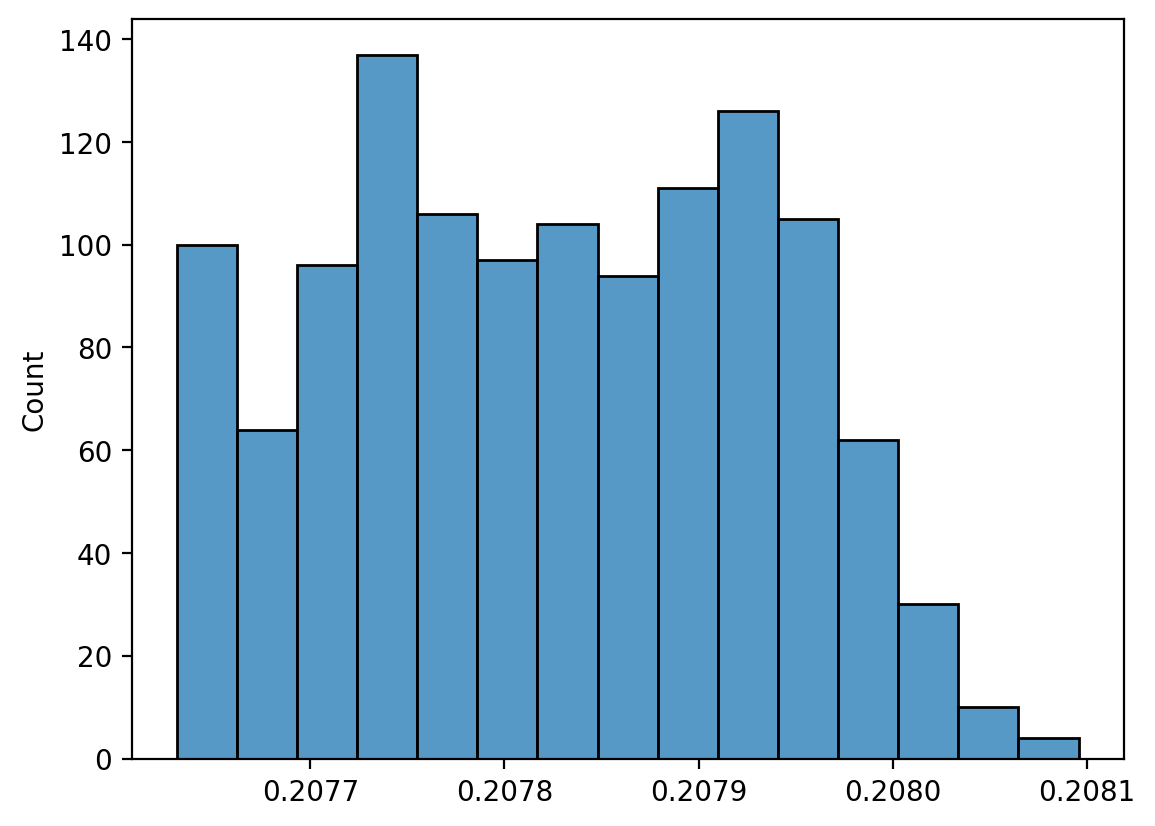

In [19]:
sns.histplot(b1[:, 22])

In [145]:
estimator.spatial_maps.shape

(15870, 7, 64, 64)

In [144]:
estimator.models[0].get_betas()

CellularNicheNetwork(
  (conditional_conv): Conv2d(1, 1, kernel_size=(1, 1), stride=(1, 1))
  (sigmoid): Sigmoid()
  (conv_layers): Sequential(
    (0): ParametrizedConv2d(
      1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0): _WeightNorm()
        )
      )
    )
    (1): PReLU(num_parameters=1)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): ParametrizedConv2d(
      32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0): _WeightNorm()
        )
      )
    )
    (4): PReLU(num_parameters=1)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ParametrizedConv2d(
      64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same
      (parametrizations): ModuleDict(
        (weight): ParametrizationList(
          (0

In [14]:
from tqdm import tqdm
import enlighten
from sklearn.metrics import r2_score

In [15]:
device = torch.device('mps')

In [16]:
from torch import nn

In [54]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.linear_model import ARDRegression


In [51]:
clusters = np.array(estimator.adata.obs[estimator.cluster_annot].values)
i = 0
X = torch.from_numpy(estimator.Xn[clusters==i]).float()
y = torch.from_numpy(estimator.yn[clusters==i]).float()
sp = torch.from_numpy(estimator.spatial_maps[clusters==i][:, i:i+1, :, :]).float()

In [55]:
ard = ARDRegression()
ard.fit(X.cpu().numpy(), y.cpu().numpy())

ARDRegression()

In [89]:
r2_score(y, ard.predict(X.cpu().numpy()))

0.9828391075134277

In [117]:
model = CellularNicheNetwork(115, anchors=np.hstack([ard.intercept_, ard.coef_])).to(device)


dataset = TensorDataset(sp, X, y)
loader = DataLoader(dataset, batch_size=512, shuffle=True)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 20
r2_scores = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    all_y_true = []
    all_y_pred = []
    
    for batch in loader:
        spatial_maps, inputs, targets = [b.to(device) for b in batch]
        
        optimizer.zero_grad()
        outputs = model(spatial_maps, inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        all_y_true.extend(targets.cpu().detach().numpy())
        all_y_pred.extend(outputs.cpu().detach().numpy())
    
    # Calculate R2 score
    r2 = r2_score(all_y_true, all_y_pred)
    r2_scores.append(r2)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss/len(loader):.4f}, R2: {r2:.4f}")



Epoch [1/20], Loss: 0.0484, R2: -0.3428
Epoch [2/20], Loss: 0.0016, R2: 0.9568
Epoch [3/20], Loss: 0.0011, R2: 0.9708
Epoch [4/20], Loss: 0.0010, R2: 0.9743
Epoch [5/20], Loss: 0.0009, R2: 0.9758
Epoch [6/20], Loss: 0.0009, R2: 0.9770
Epoch [7/20], Loss: 0.0008, R2: 0.9778
Epoch [8/20], Loss: 0.0008, R2: 0.9787
Epoch [9/20], Loss: 0.0008, R2: 0.9793
Epoch [10/20], Loss: 0.0008, R2: 0.9795
Epoch [11/20], Loss: 0.0007, R2: 0.9798
Epoch [12/20], Loss: 0.0007, R2: 0.9808
Epoch [13/20], Loss: 0.0007, R2: 0.9810
Epoch [14/20], Loss: 0.0007, R2: 0.9816
Epoch [15/20], Loss: 0.0007, R2: 0.9815
Epoch [16/20], Loss: 0.0007, R2: 0.9818
Epoch [17/20], Loss: 0.0007, R2: 0.9818
Epoch [18/20], Loss: 0.0007, R2: 0.9818
Epoch [19/20], Loss: 0.0007, R2: 0.9818
Epoch [20/20], Loss: 0.0007, R2: 0.9820


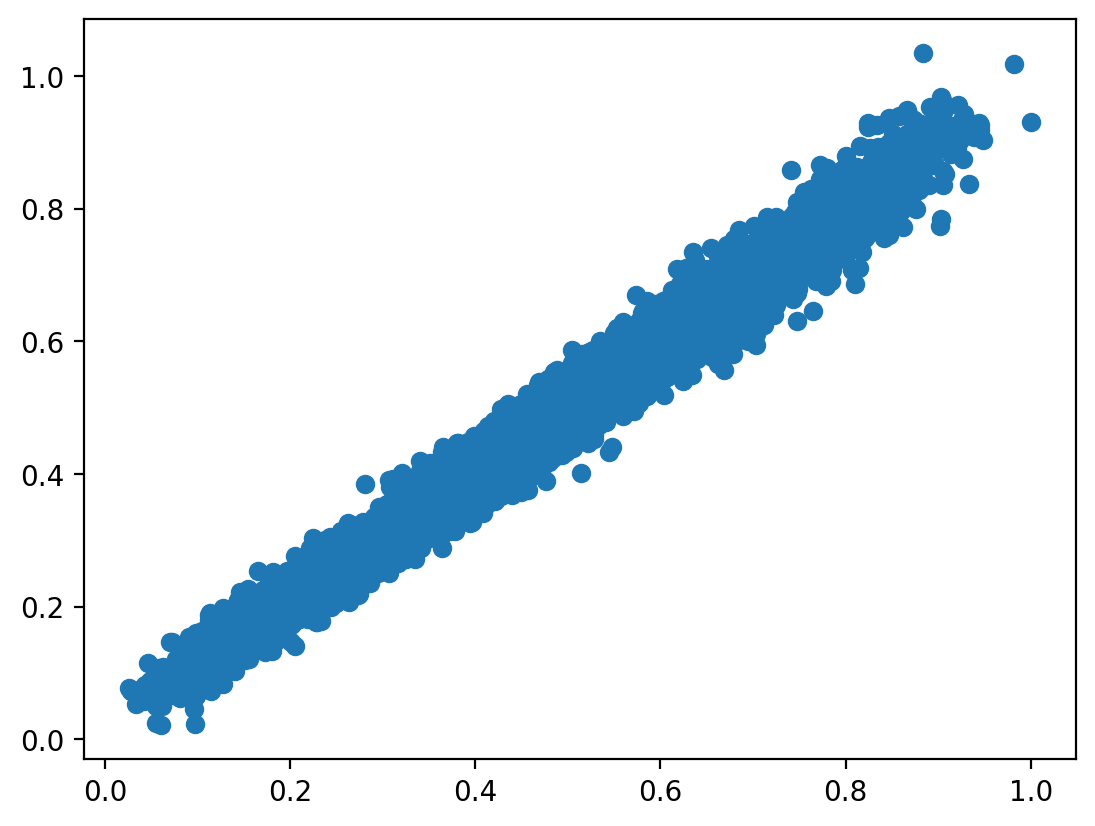

In [118]:
plt.scatter(all_y_true, all_y_pred)

In [119]:
with torch.no_grad():
    model.eval()
    betas = model.get_betas(sp[:].to(device))
betas.shape


torch.Size([10433, 116])

In [120]:
bb = betas[:, 1:].cpu().numpy()

<Axes: ylabel='Count'>

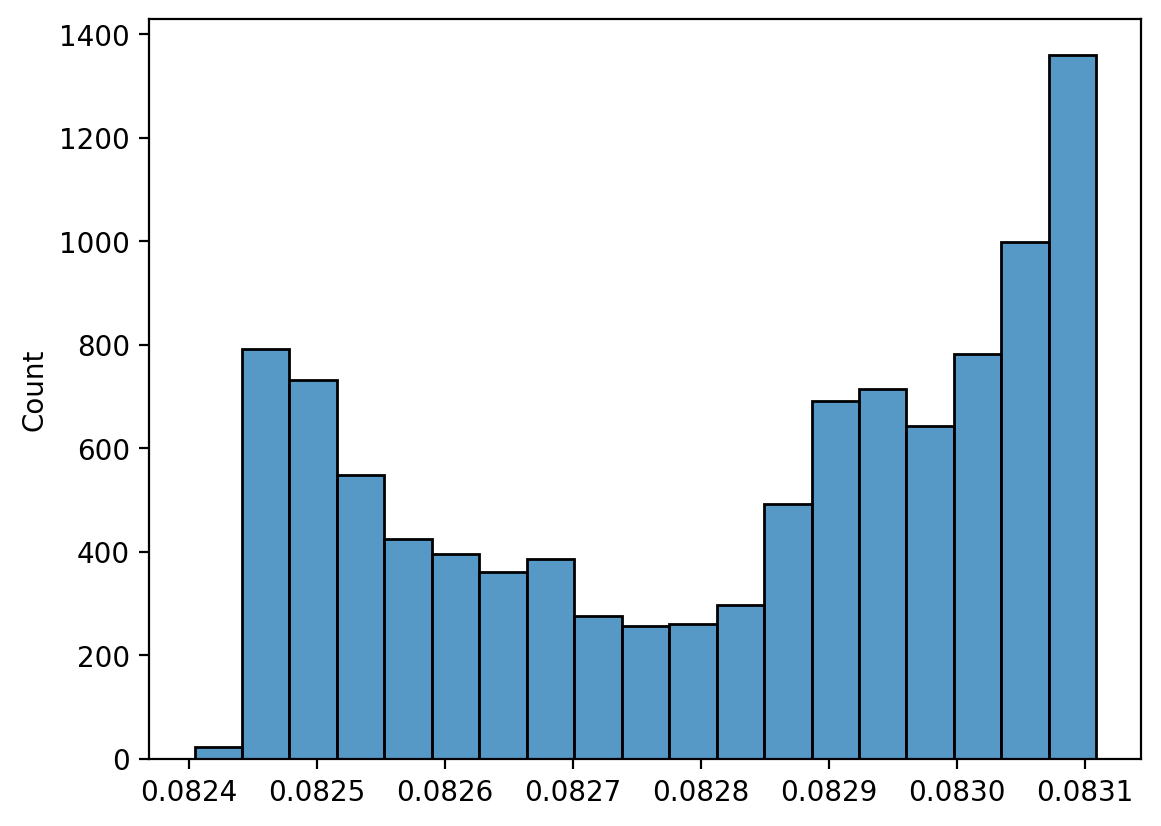

In [127]:
sns.histplot(bb[:, estimator.modulators.index('Il2$Il2rg')])
# plt.axvline(ard.coef_[estimator.modulators.index('Il15$Il2rb')], c='red')

In [126]:
pd.DataFrame(
    np.column_stack([betas.mean(0)[1:].cpu().numpy(), ard.coef_]), 
    index=estimator.modulators, columns=['SpT', 'ARD']
).sort_values('SpT', ascending=False)[:30]



SpT       ARD
Mef2c               0.347434  0.347466
Ebf1                0.285994  0.287227
Il2$Il2rg           0.082819 -0.111967
Il15$Il2rb          0.071240 -0.102392
Tnfsf13b$Tnfrsf13c  0.068489  0.069691
Mdk$Sdc4            0.061046  0.061739
C4b$Cr2             0.056561  0.065517
Ccl5$Ackr2          0.045916  0.060461
Prdm9               0.044059  0.045794
Ptn$Sdc1            0.037592  0.039139
Grn$Sort1           0.033438  0.034166
Stat2               0.031093  0.031599
Ebi3$Il27ra         0.030730  0.032749
Csf1$Csf1r          0.028059  0.035790
Ccl12$Ccr2          0.027718  0.033976
Il21$Il21r          0.027234  0.030762
Irf9                0.025435  0.026288
Sema3b$Nrp2         0.024779  0.025712
Gzma$F2r            0.024767  0.027059
Cebpb               0.024187  0.025187
Rest                0.023540  0.024880
Klf7                0.021483  0.022238
Ccl20$Ccr6          0.021268  0.024541
Sp4                 0.019429  0.020448
Cxcl12$Cxcr4        0.018056  0.029033
Gas6$Mertk          0.017207  0.017506
C3$Itgax            0.016598  0.016717
Ptn$Ncl             0.016426  0.017605
Il15$Il15ra         0.016170  0.023824
Ccl27a$Ccr2         0.011781  0.023665

array([ 0.        ,  0.0251872 , -0.03870417,  0.28722715, -0.13739534,
       -0.04604578, -0.01450244,  0.02628794,  0.02223801,  0.34746596,
       -0.01558456,  0.04579417,  0.        ,  0.02488033,  0.        ,
       -0.04294268, -0.0160398 ,  0.02044762,  0.0315992 , -0.0254028 ,
       -0.05605789, -0.0117484 ,  0.        , -0.01797512, -0.02148262,
        0.01160861, -0.01434835,  0.        ,  0.01667151, -0.04787773,
        0.        ,  0.        ,  0.        ,  0.03397621,  0.02366497,
        0.        , -0.014486  ,  0.02454097,  0.        ,  0.        ,
        0.06046119,  0.        , -0.04576382, -0.06207497,  0.        ,
        0.        ,  0.        ,  0.02903313, -0.01480891,  0.        ,
        0.00941787,  0.08625668, -0.11196717,  0.        ,  0.        ,
       -0.05927952,  0.        ,  0.02382364, -0.10239188,  0.05659318,
        0.03076164,  0.06373806,  0.        ,  0.01092697,  0.03274885,
       -0.02751954,  0.        ,  0.        ,  0.        , -0.01